In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load classification of GPCRs
gpcr_classes = pd.read_csv('../data/GuideToPharm_targets/GPCRdb_class_by_gpcr.csv')
# Load expression levels across tissues 
gpcr_expression = pd.read_csv('../data/HPA_tissue_expression/filtered_protein_expression_by_tissue.csv',index_col=0)
# Precomputed constraint metrics from gnomAD
gpcr_constraint = pd.read_csv('../data/gnomAD_population_variants/gnomad_v2.1.1_gpcr_precomputed_constraint.csv',index_col=0)
#gpcr_mutations = pd.read_csv('../data/gnomAD_population_variants/gnomad_v2.1.1_gpcr_variants_missense_labelled_classA.csv')
missense_variants_classA = pd.read_csv('../data/gnomAD_population_variants/gnomad_v2.1.1_gpcr_variants_missense_labelled_classA.csv',index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '../data/GuideToPharm_targets/GPCRdb_class_by_gpcr.csv'

In [2]:
# View of the raw mutations
def missense_log_plot(Uniprot_name_list):
        #gene_residue_labels = residue_labels_classA[residue_labels_classA['Uniprot_name'] == Uniprot_name]   
    fig, axs = plt.subplots(nrows=len(Uniprot_name_list))
    for i, protein in enumerate(Uniprot_name_list):
        gene_missense_variants = missense_variants_classA[
            missense_variants_classA['Uniprot_name'] == protein
        ]
        #print(gene_missense_variants)
        sns.barplot(
            data=gene_missense_variants,
            x='sequence_position',
            y='allele_count',
            ax=axs[i]
        )
        axs[i].semilogy()
    return None

missense_variants_classA['consequence'].value_counts()
# g = sns.countplot(data=missense_variants_classA, x='consequence')
# g.set_xticklabels(g.xaxis.get_majorticklabels(),rotation=30)
# g.set_xlabel('VEP categorical label')
missense_variants_classA[['SIFT_cat','SIFT_number']] = missense_variants_classA['SIFT'].str.split('(',expand=True)
g = sns.countplot(data=missense_variants_classA, x='SIFT_cat')
g.set_xticklabels(g.xaxis.get_majorticklabels(),rotation=30)
g.set_xlabel('SIFT categorical label')
missense_variants_classA[['PolyPhen_cat','PolyPhen_number']] = missense_variants_classA['PolyPhen'].str.split('(',expand=True)
g = sns.countplot(data=missense_variants_classA, x='PolyPhen_cat')
g.set_xticklabels(g.xaxis.get_majorticklabels(),rotation=30)
g.set_xlabel('Polyphen categorical label')


NameError: name 'missense_variants_classA' is not defined

In [ ]:
# Load classification of GPCRs
gpcr_classes = pd.read_csv('../data/target_genes/GPCRdb_class_by_gpcr.csv')
sns.set_context('poster')
constraint_by_target_gene = pd.read_csv('../data/constraint/constraint_by_target_gene.csv')
constraint_by_class = gpcr_classes.merge(constraint_by_target_gene,left_on='HGNC symbol',right_on='symbol')
constraint_chemokines = constraint_by_class[constraint_by_class.Family == 'Chemokine'].copy()
constraint_chemokines['oe_lof_upper_err'] = constraint_chemokines['oe_lof_upper'] - constraint_chemokines['oe_lof']
constraint_chemokines['oe_mis_pphen_upper_err'] = constraint_chemokines['oe_mis_pphen_upper'] - constraint_chemokines['oe_mis_pphen']
constraint_chemokines['oe_mis_non_pphen_upper_err'] = constraint_chemokines['oe_mis_non_pphen_upper'] - constraint_chemokines['oe_mis_non_pphen']
constraint_chemokines['oe_lof_lower_err'] = constraint_chemokines['oe_lof'] - constraint_chemokines['oe_lof_lower']
constraint_chemokines['oe_mis_pphen_lower_err'] = constraint_chemokines['oe_mis_pphen'] - constraint_chemokines['oe_mis_pphen_lower']
constraint_chemokines['oe_mis_non_pphen_lower_err'] = constraint_chemokines['oe_mis_non_pphen'] - constraint_chemokines['oe_mis_non_pphen_lower']

sns.set_context('talk')
fig,ax = plt.subplots(3,1,figsize=(8,8))


sns.pointplot(data=constraint_chemokines,x='HGNC symbol',y='oe_lof',ax=ax[0],scale=0.8,join=False)
sns.pointplot(data=constraint_chemokines,x='HGNC symbol',y='oe_mis_pphen',ax=ax[1],scale=0.8,join=False)
sns.pointplot(data=constraint_chemokines,x='HGNC symbol',y='oe_mis_non_pphen',ax=ax[2],scale=0.8,join=False)
ax[0].errorbar(x=constraint_chemokines['HGNC symbol'],
               y=constraint_chemokines['oe_lof'],
               yerr=constraint_chemokines[['oe_lof_lower_err','oe_lof_upper_err']].values.T,
               fmt='none'
              )
ax[1].errorbar(x=constraint_chemokines['HGNC symbol'],
               y=constraint_chemokines['oe_mis_pphen'],
               yerr=constraint_chemokines[['oe_mis_pphen_lower_err','oe_mis_pphen_upper_err']].values.T,
               fmt='none'
              )
ax[2].errorbar(x=constraint_chemokines['HGNC symbol'],
               y=constraint_chemokines['oe_mis_non_pphen'],
               yerr=constraint_chemokines[['oe_mis_non_pphen_lower_err','oe_mis_non_pphen_upper_err']].values.T,
               fmt='none'
              )
ax[0].hlines(1,0,len(constraint_chemokines)-1,color='r',linestyle='dashed',zorder=10)
ax[1].hlines(1,0,len(constraint_chemokines)-1,color='r',linestyle='dashed',zorder=10)
ax[2].hlines(1,0,len(constraint_chemokines)-1,color='r',linestyle='dashed',zorder=10)
#ax.legend(loc='upper right')
#ax.legend(bbox_to_anchor=(1,0.6))
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation=90)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('pLoF OEUF')
ax[1].set_ylabel('damaging OEUF')
ax[2].set_ylabel('benign OEUF')
ax[0].set_ylim((0,2))
ax[1].set_ylim((0,2))
ax[2].set_ylim((0,2))
ax[0].set_yticks(np.arange(0,2.5,0.5))
ax[1].set_yticks(np.arange(0,2.5,0.5))
ax[2].set_yticks(np.arange(0,2.5,0.5))
# sns.pointplot(data=chemokine_allele_counts,x='HGNC symbol',y='allele_count',hue='annotation',ax=ax[1],scale=0.8)#,linestyles='none')
# ax[1].set_yscale('log')
# _ = ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
# ax[1].legend(bbox_to_anchor=(1,0.6))
# ax[1].set_ylabel('Cumulative allele count')

plt.tight_layout()
plt.savefig('../plots/chemokine_allele_counts_and_constraint.png')

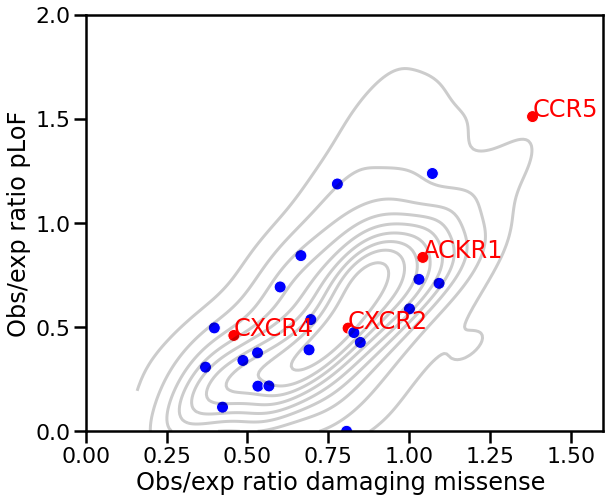

In [102]:

x = chemokines['oe_mis_pphen']
y = chemokines['oe_lof']

fig, ax = plt.subplots(figsize=(9,7.5))
sns.set_context('poster')
sns.kdeplot(data=gpcr_constraint,x='oe_mis_pphen',y='oe_lof',color='k',alpha=0.2,ax=ax,cut=0)
sns.scatterplot(x=x,y=y,hue = chemokines['HGNC symbol'].isin(['CCR5','ACKR1','CXCR2','CXCR4']),palette=('blue','red'))
#ax.errorbar(x, y, yerr=yerr, fmt='.',ecolor=col,alpha=0.5)
annotate_point = lambda gene, kw: \
    ax.annotate(gene,
        (x[chemokines['HGNC symbol']==gene],
         y[chemokines['HGNC symbol']==gene]),
        **kw
    )

annotate_point('CCR5',{'c':'r'})
annotate_point('ACKR1',{'c':'r'})
annotate_point('CXCR2',{'c':'r'})
annotate_point('CXCR4',{'c':'r'})
ax.set_xlim((0.,1.6))
ax.set_ylim((0,2))
ax.set_yticks((0,0.5,1,1.5,2))
# for i, txt in enumerate(chemokines['HGNC symbol']):
#     ax.annotate(txt, (x.values[i], y.values[i]))
ax.set_xlabel('Obs/exp ratio damaging missense ')
ax.set_ylabel('Obs/exp ratio pLoF')
ax.get_legend().remove()
# legend_colors = [matplotlib.patches.Circle((0,0),color=c) for c in custom_cols]
# plt.legend(legend_colors, ['AC','CC','CXC','XC'],
#            title='Motif',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('../plots/overall_constraint/chemokine_constraint_scatterplot.png',dpi=250)

In [72]:
gpcr_constraint_by_class = gpcr_classes.merge(gpcr_constraint,on='HGNC symbol')

chemokines = gpcr_constraint_by_class[
    (gpcr_constraint_by_class['Family'] == 'Chemokine')
]

In [ ]:
missense_variants_classA['consequence'].value_counts()
# g = sns.countplot(data=missense_variants_classA, x='consequence')
# g.set_xticklabels(g.xaxis.get_majorticklabels(),rotation=30)
# g.set_xlabel('VEP categorical label')
missense_variants_classA[['SIFT_cat','SIFT_number']] = missense_variants_classA['SIFT'].str.split('(',expand=True)
g = sns.countplot(data=missense_variants_classA, x='SIFT_cat')
g.set_xticklabels(g.xaxis.get_majorticklabels(),rotation=30)
g.set_xlabel('SIFT categorical label')
missense_variants_classA[['PolyPhen_cat','PolyPhen_number']] = missense_variants_classA['PolyPhen'].str.split('(',expand=True)
g = sns.countplot(data=missense_variants_classA, x='PolyPhen_cat')
g.set_xticklabels(g.xaxis.get_majorticklabels(),rotation=30)
g.set_xlabel('Polyphen categorical label')

In [84]:
chemokines.sort_values('oe_lof_upper')['HGNC symbol']

93      CXCR5
2       ACKR3
64       CCR1
71       CCR7
91      CXCR3
68       CCR4
66       CCR2
88     CX3CR1
70       CCR6
92      CXCR4
391      XCR1
73       CCR9
90      CXCR2
72       CCR8
65      CCR10
67       CCR3
1       ACKR2
94      CXCR6
0       ACKR1
74      CCRL2
3       ACKR4
89      CXCR1
69       CCR5
Name: HGNC symbol, dtype: object

In [164]:
oe_position_chemokines = oe_position[oe_position['HGNC symbol'].isin(chemokines['HGNC symbol'])]
oe_position_chemokines.to_csv('../data/gnomAD_population_variants/gnomad_v2.1.1_chemokine_position_constraint.csv')

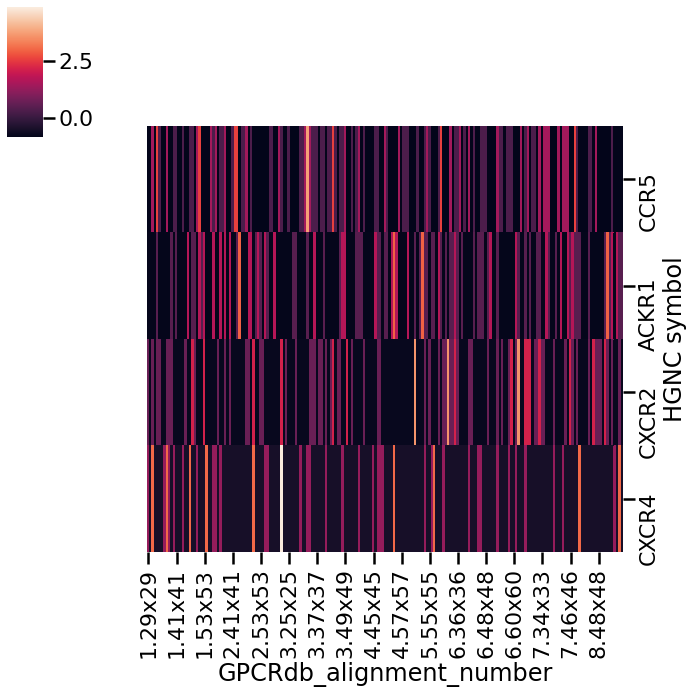

In [180]:
#fig,ax = plt.subplots(figsize=(11,8))
chemokines_wide = oe_position_chemokines.pivot(index='HGNC symbol',columns='GPCRdb_alignment_number',values='oe_missense_position').dropna(axis=1)
chemokines_selected = chemokines_wide.loc[['CCR5','ACKR1','CXCR2','CXCR4'],:]
sns.clustermap(data=chemokines_selected,col_cluster=False,row_cluster=False,metric='cosine',z_score='null')

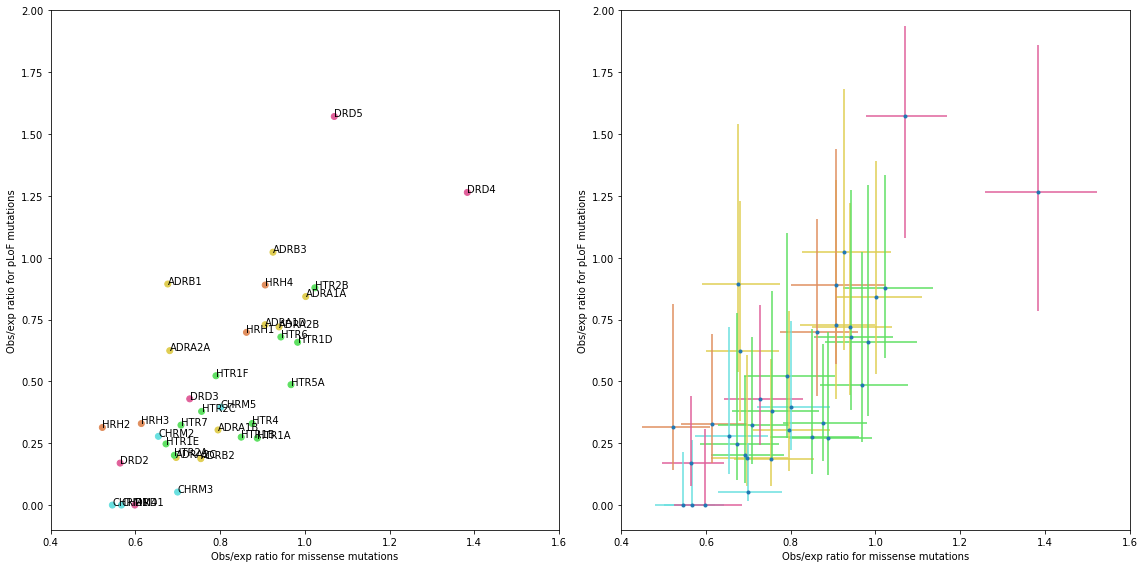

In [6]:
aminergics = gpcr_constraint_by_class[
    (gpcr_constraint_by_class['Ligand_type'] == 'Aminergic') & \
    (gpcr_constraint_by_class['Family'] != 'Trace amine')
]

x = aminergics['oe_mis']
y = aminergics['oe_lof']
xerr = np.stack((aminergics['oe_mis'] - aminergics['oe_mis_lower'], aminergics['oe_mis_upper'] - aminergics['oe_mis']))
yerr = np.stack((aminergics['oe_lof'] - aminergics['oe_lof_lower'], aminergics['oe_lof_upper'] - aminergics['oe_lof']))
col = aminergics.Family.map(dict(zip(
    ['5-Hydroxytryptamine', 'Acetylcholine (muscarinic)','Adrenoceptors', 'Dopamine', 'Histamine'],
    ['#5EE062','#69E0E0','#E0CE53','#E0609A','#E08E5E']
)))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.scatter(x,y,c=col)
for i, txt in enumerate(aminergics['HGNC symbol']):
    ax1.annotate(txt, (x.values[i], y.values[i],))
ax1.set_xlabel('Obs/exp ratio for missense mutations')
ax1.set_ylabel('Obs/exp ratio for pLoF mutations')
ax1.set_xlim((0.4,1.6))
ax1.set_ylim((-0.1,2))

ax2.errorbar(x, y, xerr=xerr, yerr=yerr,ecolor=col, fmt='.')
ax2.set_xlabel('Obs/exp ratio for missense mutations')
ax2.set_ylabel('Obs/exp ratio for pLoF mutations')
ax2.set_xlim((0.4,1.6))
ax2.set_ylim((-0.1,2))
#plt.legend(title='Family',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('../plots/aminergic_constraint_scatterplot.png',dpi=250)

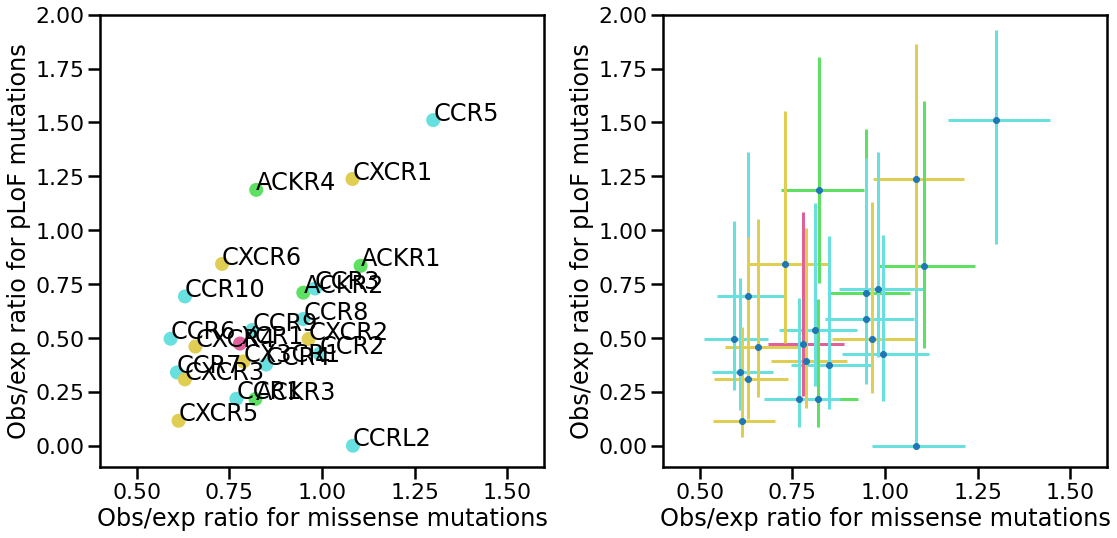

In [7]:
sns.set_context('poster')
chemokines = gpcr_constraint_by_class[
    (gpcr_constraint_by_class['Family'] == 'Chemokine')
]
x = chemokines['oe_mis']
y = chemokines['oe_lof']
xerr = np.stack((chemokines['oe_mis'] - chemokines['oe_mis_lower'], chemokines['oe_mis_upper'] - chemokines['oe_mis']))
yerr = np.stack((chemokines['oe_lof'] - chemokines['oe_lof_lower'], chemokines['oe_lof_upper'] - chemokines['oe_lof']))
col = chemokines['HGNC symbol'].str.slice(stop=2).map(dict(zip(
    ['AC','CC','CX','XC'],
    ['#5EE062','#69E0E0','#E0CE53','#E0609A']
)))


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.scatter(x,y,c=col)
for i, txt in enumerate(chemokines['HGNC symbol']):
    ax1.annotate(txt, (x.values[i], y.values[i]))
ax1.set_xlabel('Obs/exp ratio for missense mutations')
ax1.set_ylabel('Obs/exp ratio for pLoF mutations')
ax1.set_xlim((0.4,1.6))
ax1.set_ylim((-0.1,2))

ax2.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='.',ecolor=col)
ax2.set_xlabel('Obs/exp ratio for missense mutations')
ax2.set_ylabel('Obs/exp ratio for pLoF mutations')
ax2.set_xlim((0.4,1.6))
ax2.set_ylim((-0.1,2))
#plt.legend(title='Family',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('../plots/chemokine_constraint_scatterplot.png',dpi=250)

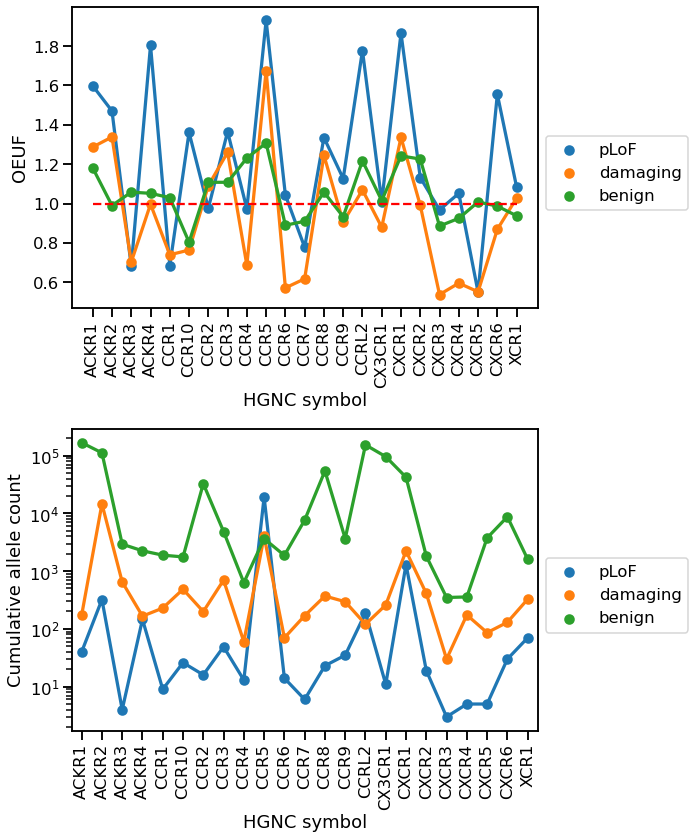

In [20]:
# Load classification of GPCRs
gpcr_classes = pd.read_csv('../data/target_genes/GPCRdb_class_by_gpcr.csv')
sns.set_context('talk')
constraint_by_target_gene = pd.read_csv('../data/constraint/constraint_by_target_gene.csv')
constraint_by_class = gpcr_classes.merge(constraint_by_target_gene,left_on='HGNC symbol',right_on='symbol')
constraint_chemokines = constraint_by_class[constraint_by_class.Family == 'Chemokine']

lof_constraint_chemokines = (constraint_chemokines[['HGNC symbol','oe_lof_upper']]
                                    .rename(columns={'oe_lof_upper':'oeuf'}))
lof_constraint_chemokines['annotation'] = 'pLoF'
damaging_constraint_chemokines = (constraint_chemokines[['HGNC symbol','oe_mis_pphen_upper']]
                                    .rename(columns={'oe_mis_pphen_upper':'oeuf'}))
damaging_constraint_chemokines['annotation'] = 'damaging'
benign_constraint_chemokines = (constraint_chemokines[['HGNC symbol','oe_mis_non_pphen_upper']]
                                    .rename(columns={'oe_mis_non_pphen_upper':'oeuf'}))
benign_constraint_chemokines['annotation'] = 'benign'

constraint_chemokines_long = pd.concat((
    lof_constraint_chemokines,
    damaging_constraint_chemokines,
    benign_constraint_chemokines
))


lof_variants = pd.read_csv('../data/gnomAD_population_variants/gnomad_v2.1.1_gpcr_variants_plof.csv',index_col=0)
mis_variants = pd.read_csv('../data/gnomAD_population_variants/gnomad_v2.1.1_gpcr_variants_missense.csv',index_col=0,low_memory=False)
gpcr_classes = pd.read_csv('../data/target_genes/GPCRdb_class_by_gpcr.csv')

lof_variants_with_class = lof_variants.merge(gpcr_classes,on='HGNC symbol')
chemokine_lof_variants = lof_variants_with_class[lof_variants_with_class.Family == 'Chemokine']
chemokine_lof_allele_counts = chemokine_lof_variants.groupby('HGNC symbol').sum().reset_index()
chemokine_lof_allele_counts['annotation'] = 'pLoF'

mis_variants_with_class = mis_variants.merge(gpcr_classes,on='HGNC symbol',how='right')

chemokine_mis_pphen_variants = mis_variants_with_class[
    (mis_variants_with_class.Family == 'Chemokine') & \
    (mis_variants_with_class.PolyPhen.str.split('(',expand=True)[0] == 'probably_damaging')    
]
chemokine_mis_pphen_allele_counts = chemokine_mis_pphen_variants.groupby('HGNC symbol').sum().reset_index()
chemokine_mis_pphen_allele_counts['annotation'] = 'damaging'

chemokine_mis_non_pphen_variants = mis_variants_with_class[
    (mis_variants_with_class.Family == 'Chemokine') & \
    ~(mis_variants_with_class.PolyPhen.str.split('(',expand=True)[0] == 'probably_damaging')    
]
chemokine_mis_non_pphen_allele_counts = chemokine_mis_non_pphen_variants.groupby('HGNC symbol').sum().reset_index()
chemokine_mis_non_pphen_allele_counts['annotation'] = 'benign'

chemokine_allele_counts = pd.concat((
    chemokine_lof_allele_counts,
    chemokine_mis_pphen_allele_counts,
    chemokine_mis_non_pphen_allele_counts
))
sns.set_context('talk')
fig,ax = plt.subplots(2,1,figsize=(10,12))

#ax[0].set_xticklabels([])
#plt.tight_layout()
#

sns.pointplot(data=constraint_chemokines_long,x='HGNC symbol',y='oeuf',hue='annotation',ax=ax[0],scale=0.8)
ax[0].hlines(1,0,len(constraint_chemokines)-1,color='r',linestyle='dashed',zorder=10)
ax[0].legend(bbox_to_anchor=(1,0.6))
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_ylabel('OEUF')

sns.pointplot(data=chemokine_allele_counts,x='HGNC symbol',y='allele_count',hue='annotation',ax=ax[1],scale=0.8)#,linestyles='none')
ax[1].set_yscale('log')
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
ax[1].legend(bbox_to_anchor=(1,0.6))
ax[1].set_ylabel('Cumulative allele count')

plt.tight_layout()
plt.savefig('../plots/chemokine_allele_counts_and_constraint.png')

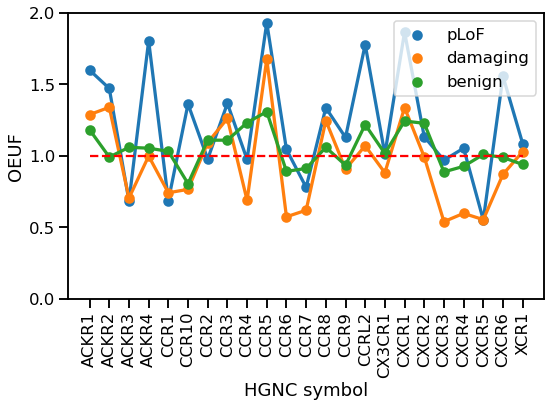

In [39]:
# Load classification of GPCRs
gpcr_classes = pd.read_csv('../data/target_genes/GPCRdb_class_by_gpcr.csv')
sns.set_context('poster')
constraint_by_target_gene = pd.read_csv('../data/constraint/constraint_by_target_gene.csv')
constraint_by_class = gpcr_classes.merge(constraint_by_target_gene,left_on='HGNC symbol',right_on='symbol')
constraint_chemokines = constraint_by_class[constraint_by_class.Family == 'Chemokine']

lof_constraint_chemokines = (constraint_chemokines[['HGNC symbol','oe_lof_upper']]
                                    .rename(columns={'oe_lof_upper':'oeuf'}))
lof_constraint_chemokines['annotation'] = 'pLoF'
damaging_constraint_chemokines = (constraint_chemokines[['HGNC symbol','oe_mis_pphen_upper']]
                                    .rename(columns={'oe_mis_pphen_upper':'oeuf'}))
damaging_constraint_chemokines['annotation'] = 'damaging'
benign_constraint_chemokines = (constraint_chemokines[['HGNC symbol','oe_mis_non_pphen_upper']]
                                    .rename(columns={'oe_mis_non_pphen_upper':'oeuf'}))
benign_constraint_chemokines['annotation'] = 'benign'

constraint_chemokines_long = pd.concat((
    lof_constraint_chemokines,
    damaging_constraint_chemokines,
    benign_constraint_chemokines
))


lof_variants = pd.read_csv('../data/gnomAD_population_variants/gnomad_v2.1.1_gpcr_variants_plof.csv',index_col=0)
mis_variants = pd.read_csv('../data/gnomAD_population_variants/gnomad_v2.1.1_gpcr_variants_missense.csv',index_col=0,low_memory=False)
gpcr_classes = pd.read_csv('../data/target_genes/GPCRdb_class_by_gpcr.csv')

lof_variants_with_class = lof_variants.merge(gpcr_classes,on='HGNC symbol')
chemokine_lof_variants = lof_variants_with_class[lof_variants_with_class.Family == 'Chemokine']
chemokine_lof_allele_counts = chemokine_lof_variants.groupby('HGNC symbol').sum().reset_index()
chemokine_lof_allele_counts['annotation'] = 'pLoF'

mis_variants_with_class = mis_variants.merge(gpcr_classes,on='HGNC symbol',how='right')

chemokine_mis_pphen_variants = mis_variants_with_class[
    (mis_variants_with_class.Family == 'Chemokine') & \
    (mis_variants_with_class.PolyPhen.str.split('(',expand=True)[0] == 'probably_damaging')    
]
chemokine_mis_pphen_allele_counts = chemokine_mis_pphen_variants.groupby('HGNC symbol').sum().reset_index()
chemokine_mis_pphen_allele_counts['annotation'] = 'damaging'

chemokine_mis_non_pphen_variants = mis_variants_with_class[
    (mis_variants_with_class.Family == 'Chemokine') & \
    ~(mis_variants_with_class.PolyPhen.str.split('(',expand=True)[0] == 'probably_damaging')    
]
chemokine_mis_non_pphen_allele_counts = chemokine_mis_non_pphen_variants.groupby('HGNC symbol').sum().reset_index()
chemokine_mis_non_pphen_allele_counts['annotation'] = 'benign'

chemokine_allele_counts = pd.concat((
    chemokine_lof_allele_counts,
    chemokine_mis_pphen_allele_counts,
    chemokine_mis_non_pphen_allele_counts
))
sns.set_context('talk')
fig,ax = plt.subplots(1,1,figsize=(8,6))

#ax[0].set_xticklabels([])
#plt.tight_layout()
#

sns.pointplot(data=constraint_chemokines_long,x='HGNC symbol',y='oeuf',hue='annotation',ax=ax,scale=0.8)
ax.hlines(1,0,len(constraint_chemokines)-1,color='r',linestyle='dashed',zorder=10)
ax.legend(loc='upper right')
#ax.legend(bbox_to_anchor=(1,0.6))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('OEUF')
ax.set_ylim((0,2))
ax.set_yticks(np.arange(0,2.5,0.5))

# sns.pointplot(data=chemokine_allele_counts,x='HGNC symbol',y='allele_count',hue='annotation',ax=ax[1],scale=0.8)#,linestyles='none')
# ax[1].set_yscale('log')
# _ = ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
# ax[1].legend(bbox_to_anchor=(1,0.6))
# ax[1].set_ylabel('Cumulative allele count')

plt.tight_layout()
plt.savefig('../plots/chemokine_allele_counts_and_constraint.png')

In [169]:
chemokine_compare_ACs = \
    pd.concat((chemokine_lof_allele_counts['HGNC symbol'],
           chemokine_mis_pphen_allele_counts['allele_count'].rename('allele_count_damaging'),
           chemokine_lof_allele_counts['allele_count'].rename('allele_count_lof')),
         axis=1)
chemokine_compare_ACs['allele_count_ratio'] = \
    chemokine_compare_ACs['allele_count_damaging'] / chemokine_compare_ACs['allele_count_lof']
np.exp(np.mean(np.log(chemokine_compare_ACs.allele_count_ratio)))

8.668321895513008

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
adhesions = gpcr_constraint_by_class[gpcr_constraint_by_class['Ligand type'] == 'Adhesion']
ax.errorbar(adhesions['oe_mis_upper'], adhesions['oe_lof_upper'],fmt='.k')
plt.xlabel('Obs/exp ratio for missense mutations (lower bound)')
plt.ylabel('Obs/exp ratio for pLoF mutations (lower bound)')
for i, txt in enumerate(adhesions['HGNC symbol']):
    ax.annotate(txt, (adhesions['oe_mis_upper'].values[i], adhesions['oe_lof_upper'].values[i]))
#plt.savefig('../plots/adhesion_constraint_scatterplot.png')

In [ ]:
# What amino acids is R3x50 mutated to?
pd.DataFrame(missense_variants_classA[missense_variants_classA.GPCRdb_alignment_number =='3.50x50'].alternate_amino_acid.value_counts()).reset_index()
# What is the fraction of singleton mutations to R3x50?
(missense_variants_classA[missense_variants_classA.GPCRdb_alignment_number =='3.50x50'].allele_count == 1).sum() / \
    missense_variants_classA[missense_variants_classA.GPCRdb_alignment_number =='3.50x50'].shape[0]
# What is the fraction of singleton mutations over all mutations?
(missense_variants_classA.allele_count == 1).sum() / \
    missense_variants_classA.shape[0]
# How many homozygous individuals for R3x50 mutations are observed?
missense_variants_classA[(missense_variants_classA.GPCRdb_alignment_number =='3.50x50') & \
                        (missense_variants_classA.num_alternate_homozygous > 0)]\
    [['Uniprot_name','reference_amino_acid','alternate_amino_acid','num_alternate_homozygous']]

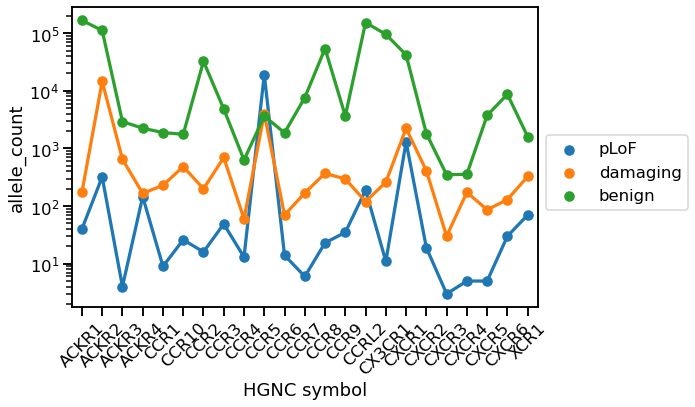

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mis_variants = pd.read_csv('../data/gnomAD_population_variants/gnomad_v2.1.1_gpcr_variants_missense_labelled_classA.csv',index_col=0)
binding_site_orthosteric_classA = pd.read_csv('../data/functional_sites_analysis/binding_sites.csv')
mis_variants['PolyPhen_qual'] = mis_variants.PolyPhen.str.split('(').apply(lambda x: x[0])
mis_variants['PolyPhen_quant'] = mis_variants.PolyPhen.str.split('(').apply(lambda x: float(x[1][:-1]))
mis_variants_orthosteric = mis_variants.merge(binding_site_orthosteric_classA,left_on='GPCRdb_alignment_number',right_on='generic_number')

gpcrdb_metadata = pd.read_csv('../data/target_genes/GPCRdb_class_by_gpcr.csv')
gpcrdb_metadata['is_aminergic'] = gpcrdb_metadata['GPCRdb_stub'].str.startswith('001_001')
aminergic_receptors = gpcrdb_metadata[gpcrdb_metadata.is_aminergic]['HGNC symbol']

aminergic_mis_variants = mis_variants[mis_variants['HGNC Symbol'].isin(aminergic_receptors)]
aminergic_mis_variants

aminergic_mis_variants_orthosteric = aminergic_mis_variants.merge(binding_site_orthosteric_classA,left_on='GPCRdb_alignment_number',right_on='generic_number')
aminergic_mis_variants_orthosteric

fig, ax = plt.subplots(2,1,figsize=(8,4))
sns.countplot(data=mis_variants,x='PolyPhen_qual',
            order=['benign','possibly_damaging','probably_damaging','unknown'],
             ax=ax[0])
sns.countplot(data=mis_variants_orthosteric,x='PolyPhen_qual',
            order=['benign','possibly_damaging','probably_damaging','unknown'],
             ax=ax[1])

fig, ax = plt.subplots(2,1)
sns.kdeplot(data=mis_variants,x='PolyPhen_quant',
           # order=['benign','possibly_damaging','probably_damaging','unknown'],
             ax=ax[0],cut=0,shade=True)
sns.kdeplot(data=mis_variants_orthosteric,x='PolyPhen_quant',
           # order=['benign','possibly_damaging','probably_damaging','unknown'],
             ax=ax[1],cut=0,shade=True)
ax[0].set_ylabel('Density\n (All variants)')
ax[1].set_ylabel('Density\n (Orthosteric binding site)')
ax[1].set_xlabel('PolyPhen score')
plt.savefig('../plots/PolyPhen_score_orthosteric',dpi=300)
